[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/tspice/blob/main/examples/tidal_potential_quickstart.ipynb)

# Tidal Gravitational Potential using `tSPICE`: Quickstart

This notebook demonstrates how to calculate the tidal potential generated by various celestial bodies at a specific location on Earth using `tSPICE`.

In [ ]:
try:
    from google.colab import drive
    %pip install -Uq git+https://github.com/DeivyMercado/TSPICE
    !mkdir -p ./gallery/
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2

Not running in Colab, skipping installation


Import package and initialize it (load data required for computations)

In [2]:
import tspice
tspice.initialize(verbose=False)

Welcome to tSPICE v0.0.2
TSPICE initialized successfully. Kernels loaded from: /Users/jzuluaga/dev/tspice/examples/tspice_data/meta_kernel


## Target body

Create a target Body:

In [3]:
earth = tspice.Body('Earth')

We need to define a location and a set of dates when to compute the tidal gravitational potential.  We use as example, the signal around (14 days before and after) the seismic event in Paratebueno, Colombia ($M_{w}=6.3$):

In [4]:
loc = dict(lat = 4.49,
           lon = -73.14,
           depth = 9)

date = dict(start = '2025-05-25 13:08:05',
            stop = '2025-06-22 13:08:05',
            step = '1h',
            time_frame = 'UTC')

## One perturbing body

Calculate the tidal gravitational potential (TGP) produced by the moon:

In [5]:
tgp_one, et_utc = earth.tgp_one_body('Moon', loc_sta=loc, dates=date, nmax=6, time_array=True)

Now we can plot it:

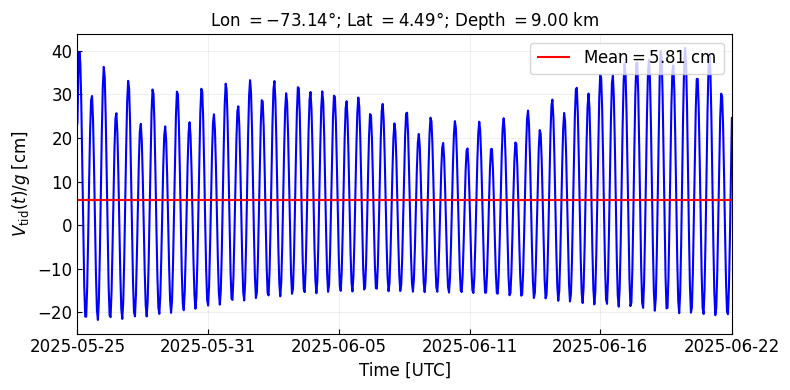

In [6]:
earth.plot_one_signal(et_utc, tgp_one*100, loc=loc, colors=['blue','red'], mean_value=True, 
                      savepath='./gallery/tgp-earth-moon.png')

## Serveral perturbing bodies

We choose the bodies to include in the calculation:

In [7]:
bodylist = ['Moon', 'Sun', 'Mercury', 'Venus', 'Mars Barycenter', 'Jupiter Barycenter']

Compute the combined TGP:

In [8]:
tgp_many = earth.tgp_many_bodies(bodylist, loc_sta=loc, dates=date, nmax=6, body_signal=False, time_array=False)

Moon contribution calculated!
Sun contribution calculated!
Mercury contribution calculated!
Venus contribution calculated!
Mars Barycenter contribution calculated!
Jupiter Barycenter contribution calculated!


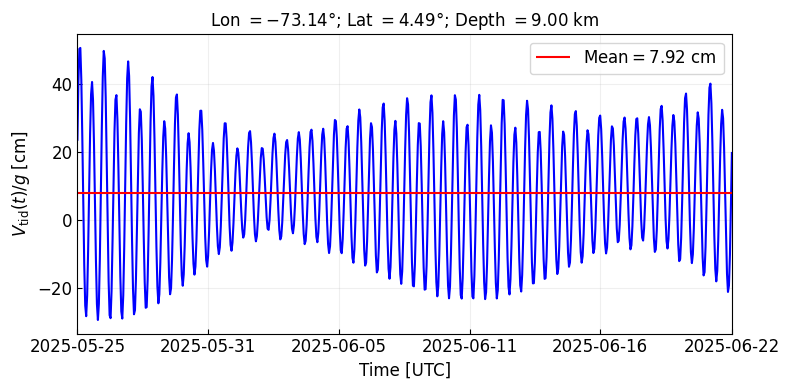

In [9]:
earth.plot_one_signal(et_utc, tgp_many*100, loc=loc, colors=['blue','red'], mean_value=True, 
                      savepath='./gallery/tgp-earth-planets.png')

## Plotting individual contributions to the TGP

We can also plot the contributions:

In [10]:
tgp_earth_bodies, et_utc = earth.tgp_many_bodies(bodylist, loc_sta=loc, dates=date, nmax=6, time_array=True, body_signal=True)
tgp_earth_total = tgp_earth_bodies.sum(axis=1)
tgp_earth_mean = tgp_earth_total.mean()

#Convert ET to UTC
utc_times = tspice.utils.et_to_utc_string(et_utc)

Moon contribution calculated!
Sun contribution calculated!
Mercury contribution calculated!
Venus contribution calculated!
Mars Barycenter contribution calculated!
Jupiter Barycenter contribution calculated!


Elements needed for plotting:

In [11]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
body_colors = {
    'Moon': '#778899',    	#Gray
    'Sun': '#EE7733',     	#Vibrant Yellow/Orange
    'Mercury': '#0077BB', 	#Blue
    'Venus': '#33BBEE',   	#Cyan
    'Earth': '#009988',   	#Blue-Green (Teal)
    'Mars': '#CC3311',    	#Red
    'Jupiter': '#DDAA33', 	#Mustard Brown
    'Saturn': '#AA3377',  	#Purple
    'Uranus': '#66CCEE',  	#Light Cyan
    'Neptune': '#004488', 	#Navy Blue
}

Contribution plotting

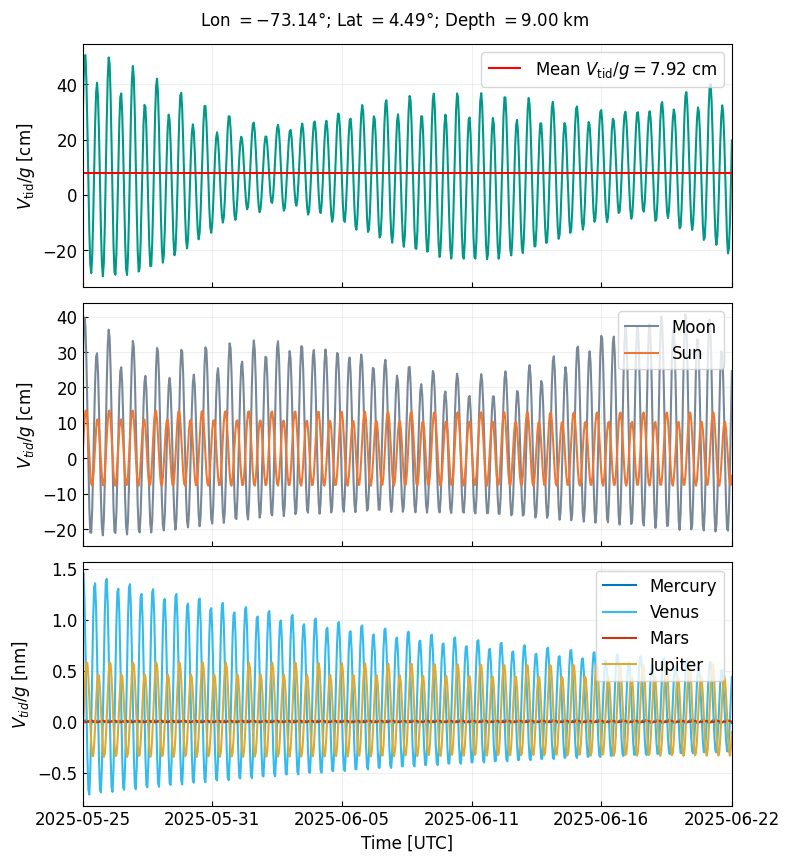

In [12]:
fig, axs = plt.subplots(3,1,figsize=(8,8.75), sharex=True)

#Taking 5 equally spaced times
ticks = np.linspace(0, len(utc_times)-1, 6, dtype=int)

#Total signal
ax = axs[0]
ax.plot(utc_times, tgp_earth_total*100, color=body_colors['Earth'])
ax.hlines(tgp_earth_mean*100, utc_times[0], utc_times[-1], color='red', label=r'Mean $V_{\text{tid}}/g=%.2f$ cm'%(tgp_earth_mean*100))
ax.set_ylabel(r'$V_{\text{tid}}/g$ [cm]', fontsize=12)
ax.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend(fontsize=12, loc='upper right')
ax.margins(x=0)
ax.grid(alpha=0.2)
ax.set_xticks([utc_times[i] for i in ticks])

#Moon and Sun contributions
ax = axs[1]
ax.plot(utc_times, tgp_earth_bodies[:,0]*100, label='Moon', color=body_colors['Moon'])
ax.plot(utc_times, tgp_earth_bodies[:,1]*100, label='Sun', color=body_colors['Sun'])
ax.set_ylabel(r'$V_{tid}/g$ [cm]', fontsize=12)
ax.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend(fontsize=12, loc='upper right')
ax.margins(x=0)
ax.grid(alpha=0.2)
ax.set_xticks([utc_times[i] for i in ticks])

#Planetary contributions
ax = axs[2]
ax.plot(utc_times, tgp_earth_bodies[:,2]*1e6, label='Mercury', color=body_colors['Mercury'])
ax.plot(utc_times, tgp_earth_bodies[:,3]*1e6, label='Venus', color=body_colors['Venus'])
ax.plot(utc_times, tgp_earth_bodies[:,4]*1e6, label='Mars', color=body_colors['Mars'])
ax.plot(utc_times, tgp_earth_bodies[:,5]*1e6, label='Jupiter', color=body_colors['Jupiter'])
ax.set_xlabel('Time [UTC]', fontsize=12)
ax.set_ylabel(r'$V_{tid}/g$ [nm]', fontsize=12)
ax.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend(fontsize=12, loc='upper right')
ax.margins(x=0)
ax.grid(alpha=0.2)
ax.set_xticks([utc_times[i] for i in ticks])

fig.suptitle('Lon $= %.2f$°; Lat $= %.2f$°; Depth $= %.2f$ km' % (loc['lon'], loc['lat'], loc['depth']), fontsize=12)
fig.subplots_adjust(hspace=0, wspace=0)
fig.tight_layout()

fig.savefig('./gallery/tgp-earth-bodies-details.png', bbox_inches='tight', dpi=300)

---
**Copyright**: 2026, Deivy Mercado, Jorge I. Zuluaga, Gloria Moncayom